## CHURN CLASSIFIER

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action = "ignore", category= FutureWarning)

### DATA

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

In [3]:
df = pd.read_csv("../DATA/Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.isnull().sum().sum()  # No missing data

0

### Some visualizations

<Axes: xlabel='InternetService', ylabel='count'>

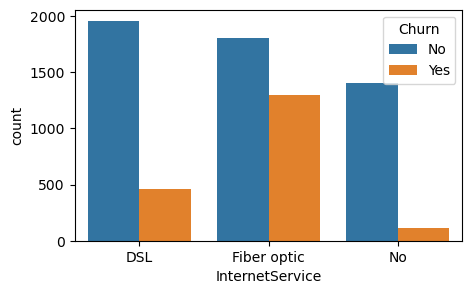

In [8]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = "InternetService", hue = "Churn")

<Axes: xlabel='StreamingMovies', ylabel='count'>

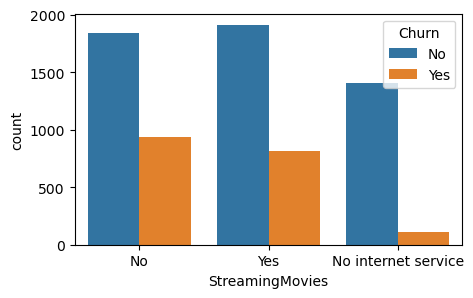

In [9]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = "StreamingMovies",hue = "Churn")

<Axes: xlabel='PhoneService', ylabel='count'>

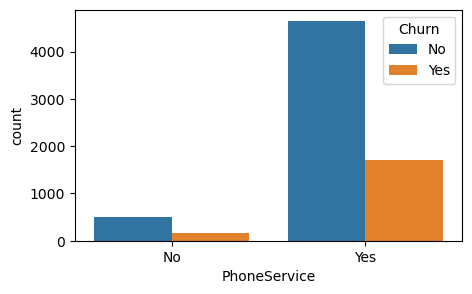

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = "PhoneService",hue = "Churn")

<Axes: xlabel='OnlineBackup', ylabel='count'>

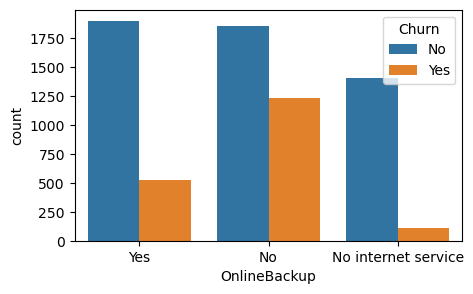

In [11]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = "OnlineBackup",hue = "Churn")

#### Scikit Learn imports

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Data pre-processing

In [13]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

In [14]:
X = pd.get_dummies(X, drop_first = True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Model

Tested for best performance across multiple tree algorithms and tuned using grid search in which Ada boosted Decision tree gave the best results

In [16]:
model = AdaBoostClassifier(n_estimators = 100)

In [17]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

### Predictions and Evaluation

In [18]:
pred = model.predict(X_test)

In [57]:
ind = model.feature_importances_ > 0.01

In [58]:
x1 = model.feature_importances_[ind]

In [59]:
x2 = X.columns[ind]

Text(0.5, 1.0, 'Top 5 contributors to the classification\nwith feature importance')

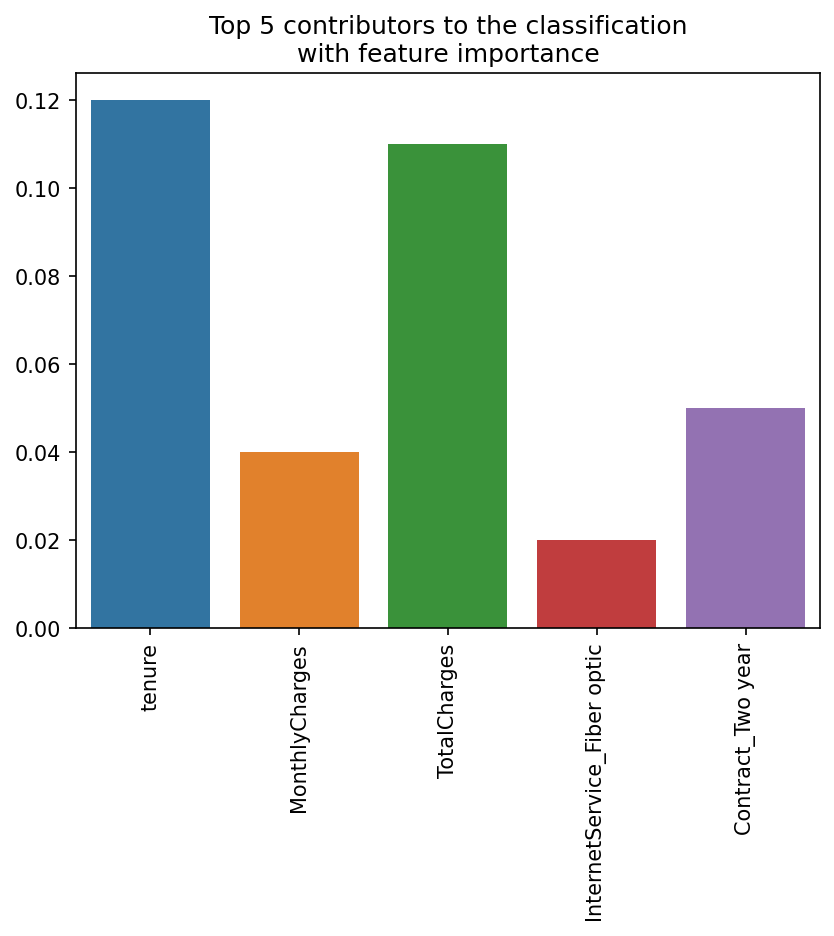

In [67]:
plt.figure(dpi = 150)
sns.barplot(x = x2, y = x1)
plt.xticks(rotation = 90);
plt.title("Top 5 contributors to the classification\nwith feature importance")

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.88      0.91      0.90       557
         Yes       0.62      0.53      0.57       147

    accuracy                           0.83       704
   macro avg       0.75      0.72      0.73       704
weighted avg       0.83      0.83      0.83       704



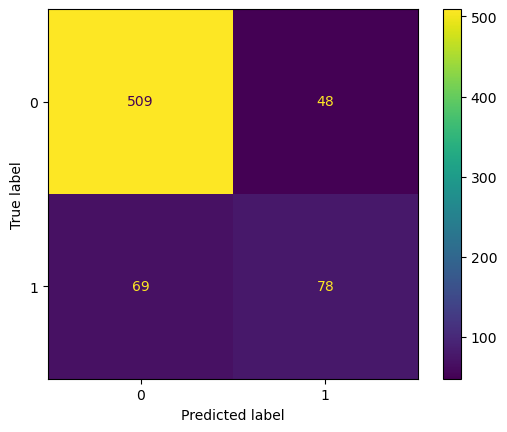

In [20]:
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, pred))
matrix.plot()

In [23]:
accuracy_score(y_test, pred).round(4)

0.8338

### 83.38% accuracy with acceptable F1 score